<a href="https://colab.research.google.com/github/devesh8423/Complete_DeepLearning/blob/main/Early_stopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles


In [4]:
x,z=make_circles(n_samples=100,noise=0.1,random_state=1)

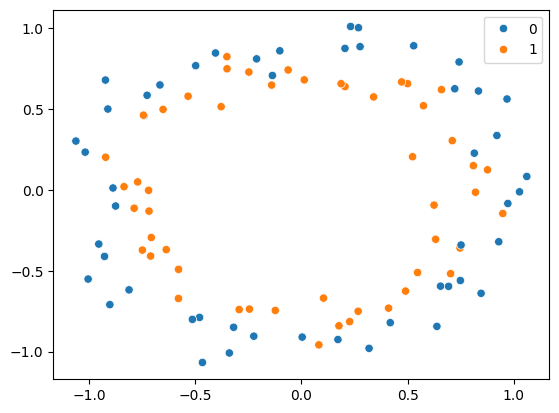

In [6]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=z);

In [15]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,z,test_size=0.2,random_state=42)

In [16]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
import time
start =time.time()
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,verbose=1)
end=time.time()
print(end-start)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.5156 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.7001
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5156 - loss: 0.6886 - val_accuracy: 0.4000 - val_loss: 0.7038
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5477 - loss: 0.6856 - val_accuracy: 0.3500 - val_loss: 0.7071
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4984 - loss: 0.6886 - val_accuracy: 0.3500 - val_loss: 0.7104
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5188 - loss: 0.6890 - val_accuracy: 0.3500 - val_loss: 0.7136
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5383 - loss: 0.6853 - val_accuracy: 0.3500 - val_loss: 0.7170
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5422 - loss: 0.6826 - val_accuracy: 0.3500 - val_loss: 0.7197
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5188 - loss: 0.6836 - val_accuracy: 0.3500 - val_loss

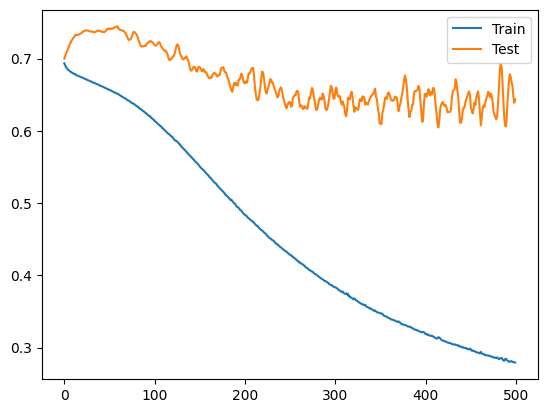

In [19]:
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.legend()

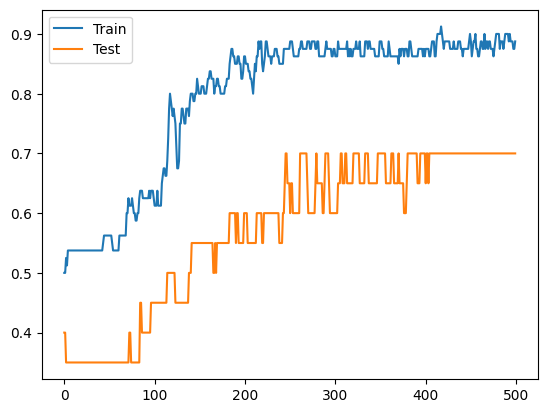

In [20]:
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.legend()

#**EarlyStopping**

In [22]:
model=Sequential()
model.add(Dense(256,input_dim=2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [23]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

#**if you set patience=5 the mlodel will keep training for up to 5 more epochs after it stoping improving, if there still no improvement ,it will stop training**

In [39]:
from re import VERBOSE
Callback=EarlyStopping(
    monitor="val_accuracy", # kis chiz ko reduce krna chahte ho loss ya accuracy
    min_delta=0.00001,  #
    patience=20,
    mode="auto",
    verbose=1
)

In [40]:
import time
start =time.time()
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,callbacks=Callback)
end=time.time()
print(end-start)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5867 - loss: 0.6356 - val_accuracy: 0.4000 - val_loss: 0.7251
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5969 - loss: 0.6368 - val_accuracy: 0.4000 - val_loss: 0.7259
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6023 - loss: 0.6297 - val_accuracy: 0.3500 - val_loss: 0.7274
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5398 - loss: 0.6428 - val_accuracy: 0.3500 - val_loss: 0.7275
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6141 - loss: 0.6277 - val_accuracy: 0.3500 - val_loss: 0.7287
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5867 - loss: 0.6328 - val_accuracy: 0.4000 - val_loss: 0.7290
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5867 - loss: 0.6244 - val_accuracy: 0.3500 - val_loss: 0.7305
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6086 - loss: 0.6233 - val_accuracy: 0.4000 - val_loss:

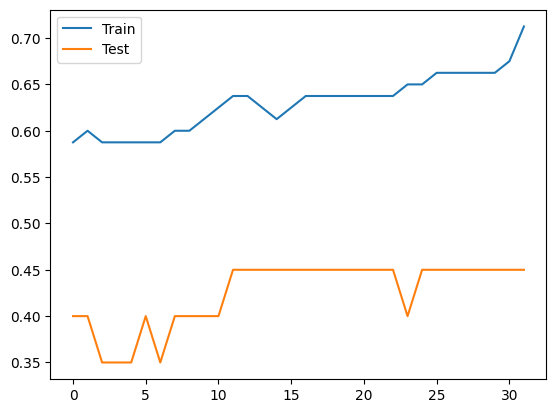

In [41]:
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.legend()

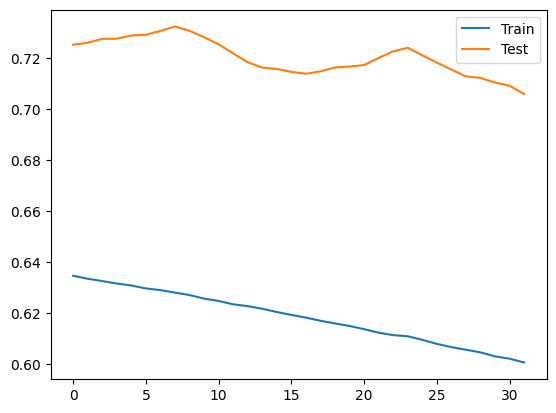

In [42]:
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.legend()